# IMPORTS AND READ CSV

In [71]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import yule_walker
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA

In [72]:
df_time_series = pd.read_csv('datasets/historical_demand_sum.csv', index_col='time_index')
df_time_series.index = pd.to_datetime(df_time_series.index)

df_time_series.head()

,demand_MWh
time_index,
2012-01-01,1.080470e+07
2012-02-01,1.008555e+07
2012-03-01,1.017537e+07
2012-04-01,8.969068e+06
2012-05-01,9.597272e+06


<AxesSubplot: xlabel='time_index'>

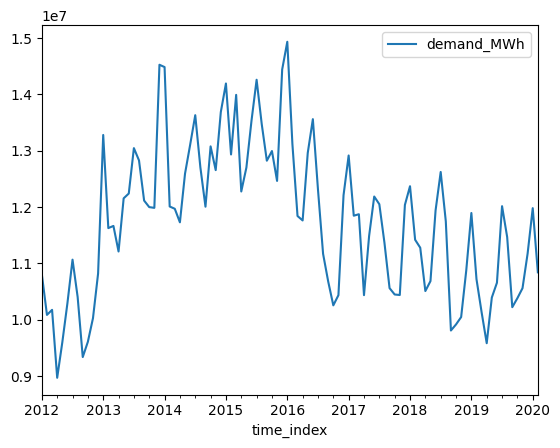

In [73]:
df_time_series.plot()

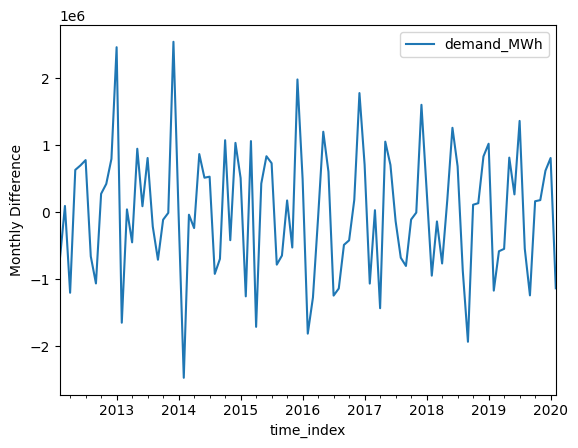

In [74]:
# Need to difference
df_time_series_diff_first = df_time_series.diff().dropna()
ax = df_time_series_diff_first.plot()
ax.set_ylabel("Monthly Difference")
plt.show()

In [75]:
utils.is_stationary(df_time_series_diff)

True

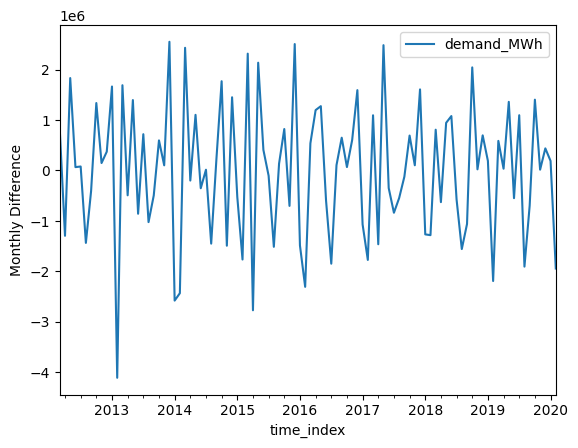

In [76]:
# Differenciate again
df_time_series_diff_second = df_time_series_diff_first.diff().dropna()
ax = df_time_series_diff_second.plot()
ax.set_ylabel("Monthly Difference")
plt.show()

In [77]:
utils.is_stationary(df_time_series_diff_second)

True

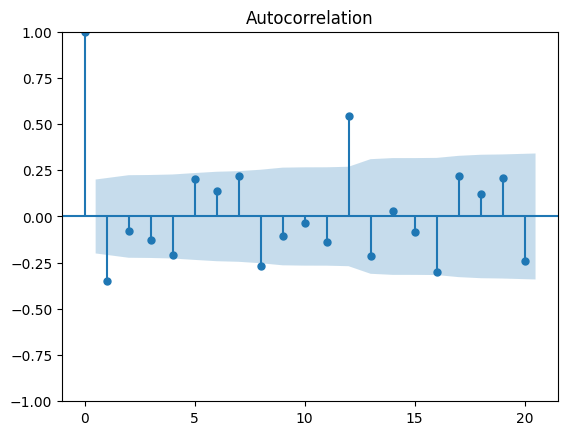

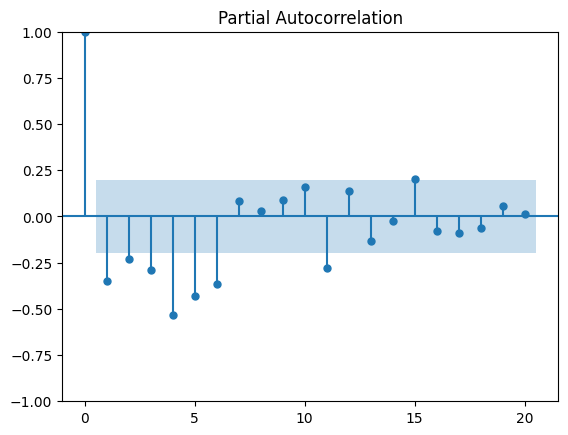

In [78]:
plot_acf(df_time_series_diff_second, lags=20)
plot_pacf(df_time_series_diff_second, lags=20, method="ywm")
plt.show()

# FIT

/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


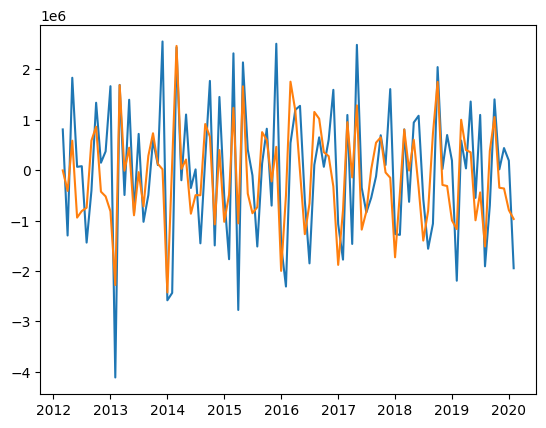

0.46293763912301344


In [79]:
# Forecast the first MA(1) model
mod = ARIMA(df_time_series_diff_second, order=(0,0,1))
res = mod.fit()
# orig_data = df_time_series_diff_second.astype("datetime64[M]")
orig_data = df_time_series_diff_second
# print(orig_data)
# pd.to_datetime(orig_data.index)
# print(orig_data)
pred = res.predict()
# print(pred)
plt.plot(orig_data)
plt.plot(pred)
plt.show()
print(r2_score(orig_data, pred))

In [80]:
# train = data.diff().dropna()[0:240]
# test = data.diff().dropna()[240:250]
train = df_time_series_diff_second[:-10]
test = df_time_series_diff_second[-10:]
# Forecast the first MA(1) model

mod = ARIMA(train, order=(0,0,1))
res = mod.fit()
orig_data = df_time_series_diff_second

pred = res.predict()
fcst = res.forecast(steps = len(test))
print(r2_score(train, pred))
print(r2_score(test, fcst))

0.4604449402961106
0.0884365944144555


/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
test['demand_MWh']

time_index
2019-05-01    1362357.136
2019-06-01    -549005.499
2019-07-01    1097098.487
2019-08-01   -1907673.050
2019-09-01    -697241.818
2019-10-01    1405452.685
2019-11-01      16857.140
2019-12-01     438964.605
2020-01-01     190035.440
2020-02-01   -1945666.976
Name: demand_MWh, dtype: float64

In [12]:
fcst

2019-05-01    571827.057509
2019-06-01      1955.597123
2019-07-01      1955.597123
2019-08-01      1955.597123
2019-09-01      1955.597123
2019-10-01      1955.597123
2019-11-01      1955.597123
2019-12-01      1955.597123
2020-01-01      1955.597123
2020-02-01      1955.597123
Freq: MS, Name: predicted_mean, dtype: float64

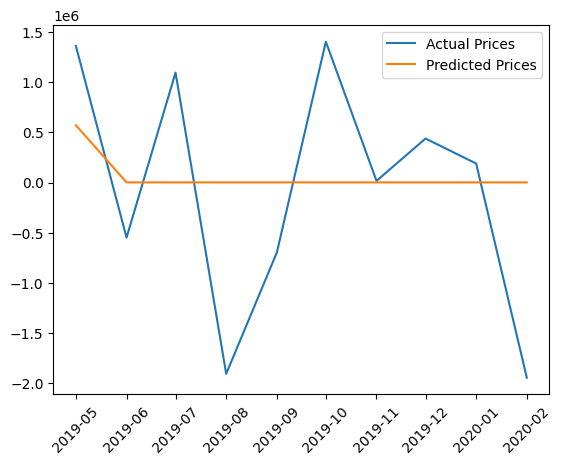

In [81]:
plt.plot(test['demand_MWh'])
plt.plot(fcst)
plt.legend(['Actual Prices', 'Predicted Prices'])
plt.xticks(rotation=45)
plt.show()

In [82]:
print(type(train.tail(1).index))
print(test)
print(df_time_series_diff_second.tail(10))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
             demand_MWh
time_index             
2019-05-01  1362357.136
2019-06-01  -549005.499
2019-07-01  1097098.487
2019-08-01 -1907673.050
2019-09-01  -697241.818
2019-10-01  1405452.685
2019-11-01    16857.140
2019-12-01   438964.605
2020-01-01   190035.440
2020-02-01 -1945666.976
             demand_MWh
time_index             
2019-05-01  1362357.136
2019-06-01  -549005.499
2019-07-01  1097098.487
2019-08-01 -1907673.050
2019-09-01  -697241.818
2019-10-01  1405452.685
2019-11-01    16857.140
2019-12-01   438964.605
2020-01-01   190035.440
2020-02-01 -1945666.976


/tmp/ipykernel_1161/854293265.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']


0.4467565764518332


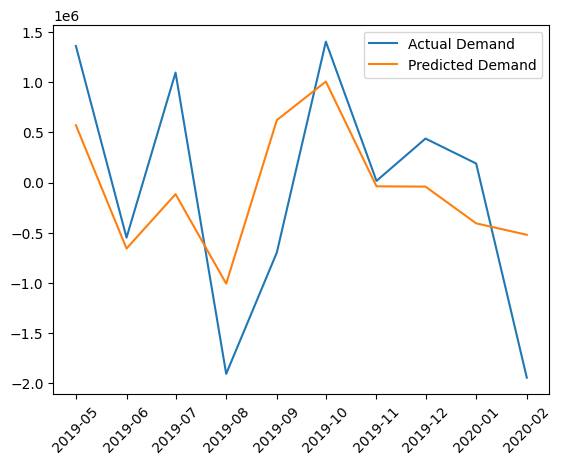

In [83]:
# fcst = []
train = df_time_series_diff_second[:-10]
test = df_time_series_diff_second[-10:]

fcst = pd.DataFrame(columns=['demand_MWh'])
fcst.index.name = 'time_index'
# for step in range(len(test)):
for index, values in test.iterrows():
    # print(values['demand_MWh'])
    # print(index.dtype)
    # print(type(index.to_datetime64()))
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,1))
    res = mod.fit()
    orig_data = df_time_series_diff_second
    pred = res.predict()
    # fcst.concat(pd.DataFrame(res.forecast(steps = 1), index=[index]))
    # print(index)
    fcst.loc[index.to_datetime64(), 'demand_MWh'] = res.forecast(steps = 1).iloc[0]
    # fcst += pd.Series(res.forecast(steps = 1), index=[index])
    # print(fcst)
    # fcst += res.forecast(steps = 1)
    train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']
    pd.concat([train,values])
print(r2_score(test['demand_MWh'], fcst['demand_MWh']))
plt.plot(test['demand_MWh'])
plt.plot(fcst['demand_MWh'])
plt.legend(['Actual Demand', 'Predicted Demand'])
plt.xticks(rotation=45)
plt.show()

# GRID SEARCH

In [103]:
def evaluate2(order):
    train = df_time_series_diff_second[:-10]
    test = df_time_series_diff_second[-10:]
    
    fcst = pd.DataFrame(columns=['demand_MWh'])
    fcst.index.name = 'time_index'
    for index, values in test.iterrows():
        # Forecast the first MA(1) model
        mod = ARIMA(train.reset_index(drop=True), order=(0,0,order))
        res = mod.fit()
        orig_data = df_time_series_diff_second
        pred = res.predict()
        fcst.loc[index.to_datetime64(), 'demand_MWh'] = res.forecast(steps = 1).iloc[0]        
        train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']
    return r2_score(test['demand_MWh'], fcst['demand_MWh'])
scores = []

for i in range(1, 21):
 scores.append((i, evaluate2(i)))
# observe best order is 4 with R2 of 0.566
scores = pd.DataFrame(scores)
print(scores[scores[1] == scores.max()[1]])

/tmp/ipykernel_300/13846856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/tmp/ipykernel_300/13846856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']
/home/tomas/codes/electric_energy_demand_argentina

     0        1
19  20  0.81656


/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/tomas/codes/electric_energy_demand_argentina/env/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. C

0.8165602736397606


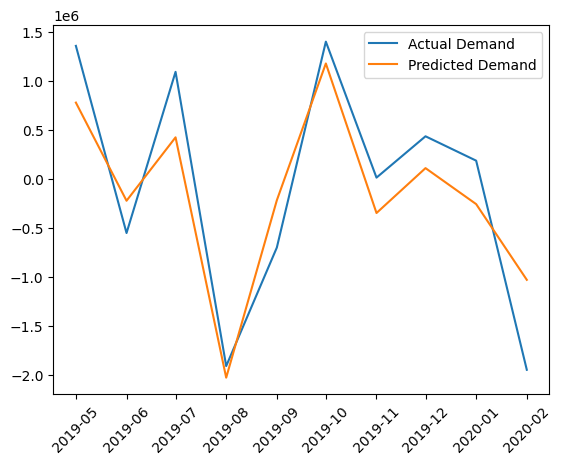

In [118]:
# fcst = []
train_original = df_time_series_diff_second[:-10]
train = train_original.copy()
test = df_time_series_diff_second[-10:]

fcst = pd.DataFrame(columns=['demand_MWh'])
fcst.index.name = 'time_index'
# for step in range(len(test)):
for index, values in test.iterrows():
    # print(values['demand_MWh'])
    # print(index.dtype)
    # print(type(index.to_datetime64()))
    # Forecast the first MA(1) model
    mod = ARIMA(train.reset_index(drop=True), order=(0,0,20))
    res = mod.fit()
    orig_data = df_time_series_diff_second
    pred = res.predict()
    # fcst.concat(pd.DataFrame(res.forecast(steps = 1), index=[index]))
    # print(index)
    fcst.loc[index.to_datetime64(), 'demand_MWh'] = res.forecast(steps = 1).iloc[0]
    # fcst += pd.Series(res.forecast(steps = 1), index=[index])
    # print(fcst)
    # fcst += res.forecast(steps = 1)
    train.loc[index.to_datetime64(), 'demand_MWh'] = values['demand_MWh']
    pd.concat([train,values])
print(r2_score(test['demand_MWh'], fcst['demand_MWh']))
plt.plot(test['demand_MWh'])
plt.plot(fcst['demand_MWh'])
plt.legend(['Actual Demand', 'Predicted Demand'])
plt.xticks(rotation=45)
plt.show()

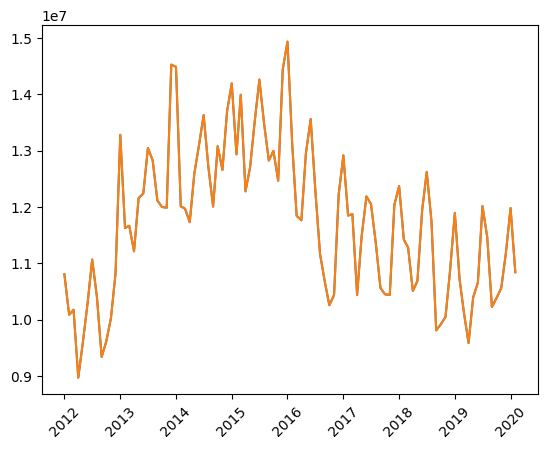

In [110]:
prueba_diff_cumsum_first = pd.concat([df_time_series_diff_second, df_time_series_diff_first.iloc[[0]]], axis=0).sort_index().cumsum()
prueba_diff_cumsum_second = pd.concat([prueba_diff_cumsum_first, df_time_series.iloc[[0]]], axis=0).sort_index().cumsum()
plt.plot(prueba_diff_cumsum_second)
plt.plot(df_time_series)
plt.xticks(rotation=45)
plt.show()

In [137]:
train_plus_fcst = pd.concat([train_original, fcst])
train_plus_test = pd.concat([train_original, test])
# train_plus_test.equals(df_time_series_diff_second)
# print(test)
# print(fcst)
# print(df_time_series_diff_second)

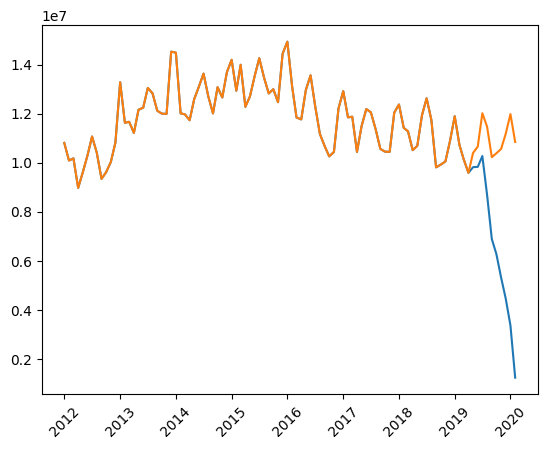

In [138]:
prueba_diff_cumsum_first_fcst = pd.concat([train_plus_fcst, df_time_series_diff_first.iloc[[0]]], axis=0).sort_index().cumsum()
prueba_diff_cumsum_second_fcst = pd.concat([prueba_diff_cumsum_first_fcst, df_time_series.iloc[[0]]], axis=0).sort_index().cumsum()
plt.plot(prueba_diff_cumsum_second_fcst)
plt.plot(df_time_series)
plt.xticks(rotation=45)
plt.show()

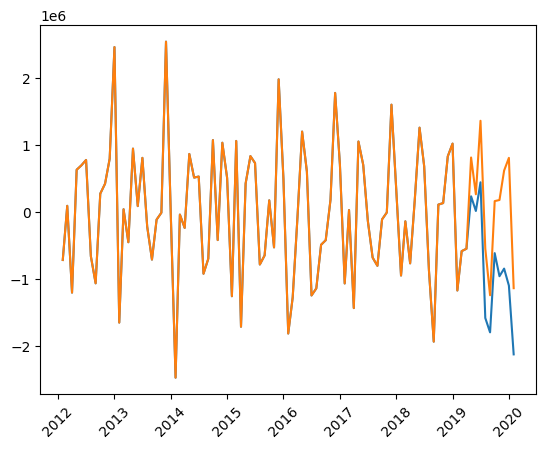

In [139]:
plt.plot(prueba_diff_cumsum_first_fcst)
plt.plot(df_time_series_diff_first)
plt.xticks(rotation=45)
plt.show()

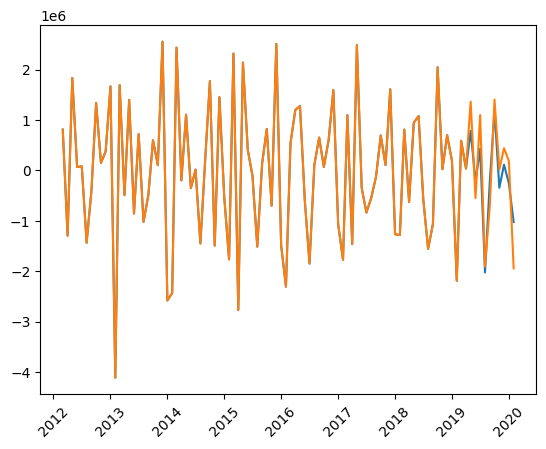

In [140]:
plt.plot(train_plus_fcst)
plt.plot(train_plus_test)
plt.xticks(rotation=45)
plt.show()